In [114]:
import geopandas as gpd
import matplotlib.pyplot as plt
import glob,pathlib,warnings
import pandas as pd

### Data source


* Data can be downloaded from FAO United Nations, You can get ESRI shape files in a .zip file for all continents. 
Link: https://data.apps.fao.org/catalog/organization/fao-aquastat?q=rivers&sort=score+desc%2C+metadata_modified+desc


* Reference article : https://milanjanosov.substack.com/p/river-maps-in-python-tutorial?triedRedirect=true

### Read data

In [85]:
list_path = glob.glob('data/*.zip')

GeoDF = []
for path in list_path:
    regDF = gpd.read_file(path)
    regDF['Region_id']=pathlib.PurePath(path).name[7:-4]
    GeoDF.append(regDF)

world_riverDF = gpd.GeoDataFrame(pd.concat(GeoDF, ignore_index=True))

regDF = []
GeoDF = []

### Save combined Data

In [90]:
#world_riverDF.to_csv("world_rivers_full1.csv")
#twkbDF = world_riverDF.to_wkb()
#twkbDF.to_parquet("world_riversWKB_full1.parquet")

### Load Data

In [93]:
riverDF = pd.read_parquet('world_riversWKB_full.parquet', engine='pyarrow')

In [94]:
riverDF.head(3)

,FID_af_str,ARCID,FROM_NODE,TO_NODE,FID_sub_ba,SUB_BAS,MAJ_BAS,MAJ_NAME,SUB_NAME,MAJ_AREA,...,geometry,Region_id,FID_as_str,FID_subbas,RASTERVALU,FID_au_str,FID_ca_str,FID_eu_str,FID_na_str,FID_sa_str
0,0.0,1,2,1,32890.0,201591,7020,Mediterranean South Coast,Algerian east coast,558292,...,b'\x01\x02\x00\x00\x00\x03\x00\x00\x000\x10\x1...,africa_37333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2,5,4,32890.0,201591,7020,Mediterranean South Coast,Algerian east coast,558292,...,b'\x01\x02\x00\x00\x00\x03\x00\x00\x00`CDDD\xe...,africa_37333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,3,6,7,32890.0,201591,7020,Mediterranean South Coast,Algerian east coast,558292,...,b'\x01\x02\x00\x00\x00\x02\x00\x00\x00\x10\xff...,africa_37333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
riverDF.columns

Index(['FID_af_str', 'ARCID', 'FROM_NODE', 'TO_NODE', 'FID_sub_ba', 'SUB_BAS',
       'MAJ_BAS', 'MAJ_NAME', 'SUB_NAME', 'MAJ_AREA', 'LEGEND', 'SUBBAS_ID',
       'TOBAS_ID', 'Strahler', 'A_Strahler', 'RASTERVA_2', 'RASTERVA_1',
       'Regime', 'geometry', 'Region_id', 'FID_as_str', 'FID_subbas',
       'RASTERVALU', 'FID_au_str', 'FID_ca_str', 'FID_eu_str', 'FID_na_str',
       'FID_sa_str'],
      dtype='object')

In [97]:
#riverDF.columns
riverDF=riverDF.drop(['FID_af_str', 'ARCID', 'FROM_NODE', 'TO_NODE', 'FID_sub_ba', 'SUB_BAS',
       'MAJ_BAS', 'MAJ_NAME', 'SUB_NAME', 'MAJ_AREA', 'LEGEND', 'SUBBAS_ID',
       'TOBAS_ID', 'RASTERVA_2', 'RASTERVA_1',
       'Regime',  'FID_as_str', 'FID_subbas', 'RASTERVALU',
       'FID_au_str', 'FID_ca_str', 'FID_eu_str', 'FID_na_str', 'FID_sa_str'], axis=1)

### Geodataframe

In [99]:
gdf = gpd.GeoDataFrame(riverDF)
#Convert WKB to geometry(LINESTRING)
gdf['geometry'] =  gpd.GeoSeries.from_wkb(gdf['geometry'], index=None)

### Plot the map

In [123]:
def plot_riverMap(gdf,cmap):
    """
    gdf = geo dataframe with geometry
    """
    #converting the Strahler index into line-width values
    gdf['width'] = 10 - gdf.A_Strahler
    gdf['width'] = gdf['width']/float(5)
    #creating a canvas in matplotlib
    f, ax = plt.subplots(1,1,figsize=(15,15))
    #doing the plotting
    gdf.plot( column = 'A_Strahler',ax=ax, linewidth = gdf['width'], cmap = cmap)#
    #editing the plot
    f.patch.set_facecolor('k')  # Set figure background color to black
    ax.set_facecolor('k')       # Set axes background color to black
    ax.axis('off')              # Remove the axis

    #plt.savefig('rivers_S_and_SE_asia.png', dpi = 200, bbox_inches = 'tight')


In [116]:
#ShapelyDeprecationWarning , pd.errors.SettingWithCopyWarning
warnings.filterwarnings("ignore") 

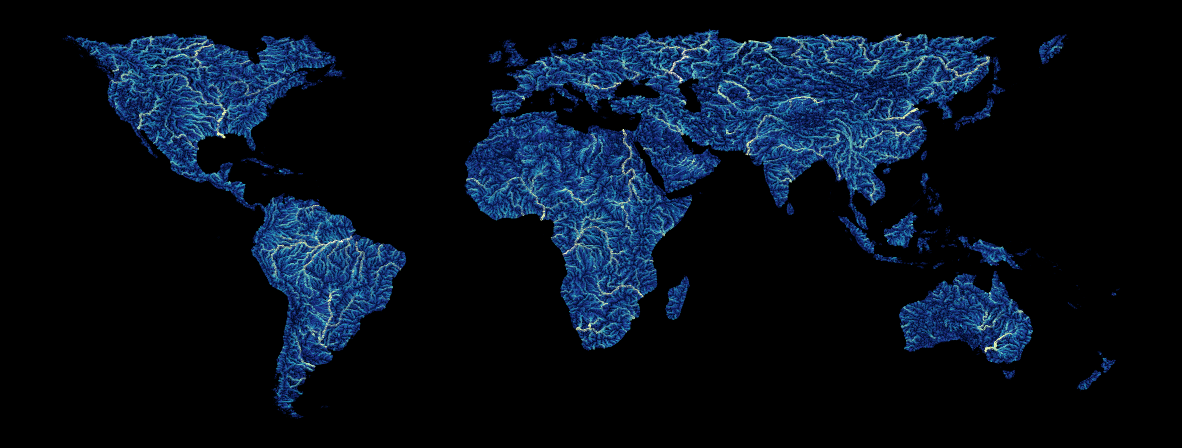

In [124]:
plot_riverMap(gdf,'YlGnBu')

### Plot regions

In [118]:
col = 'Region_id'
print(len(pd.unique(riverDF[col])))
print(pd.unique(riverDF[col]))

8
['africa_37333' 'asia_37331' 'australia_37252' 'centam_37249'
 'europe_37253' 'neareast_37340' 'noram_37341' 'samerica_37330']


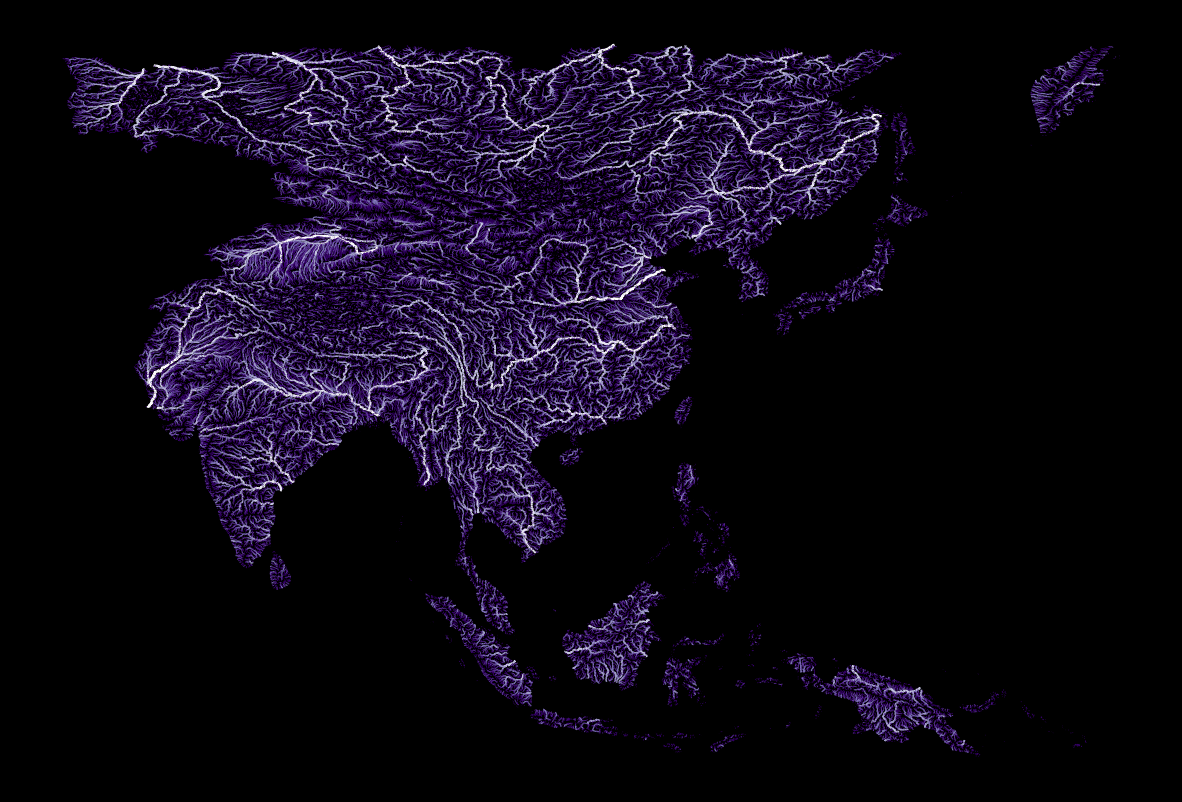

In [125]:
region_id = 'asia_37331'
River_reg = gdf.loc[gdf['Region_id']== region_id]
plot_riverMap(River_reg,'Purples')